In [ ]:
from torchvision.datasets import FashionMNIST
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [1]:
train_set = FashionMNIST(root='data',
                         train = True,
                         download = True)

img, label = train_set[0]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



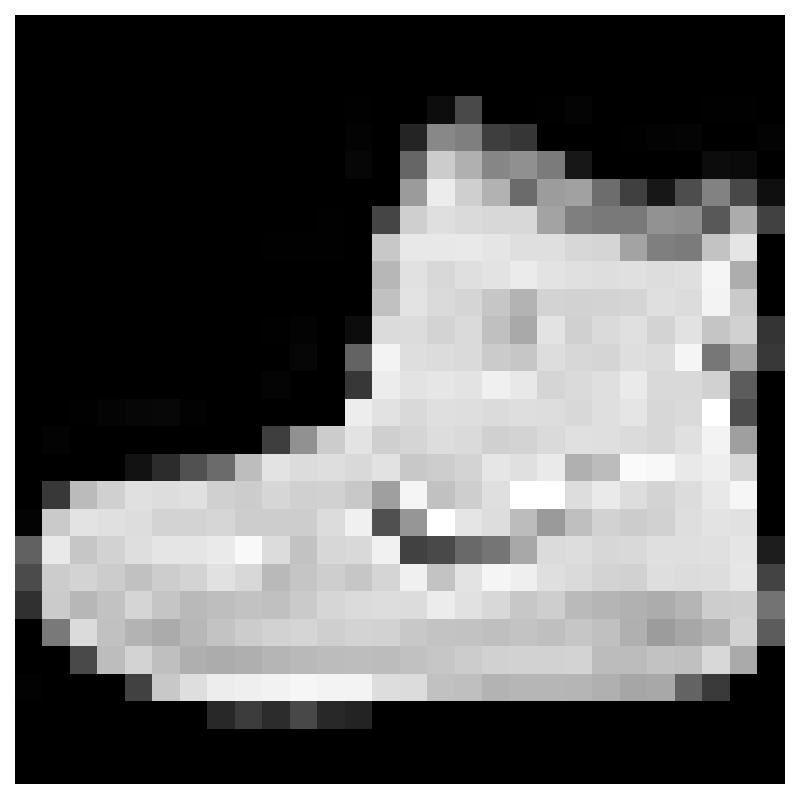

In [2]:
image, _ = train_set[0]
_, label = train_set[0]

plt.figure(figsize = (9, 9))
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

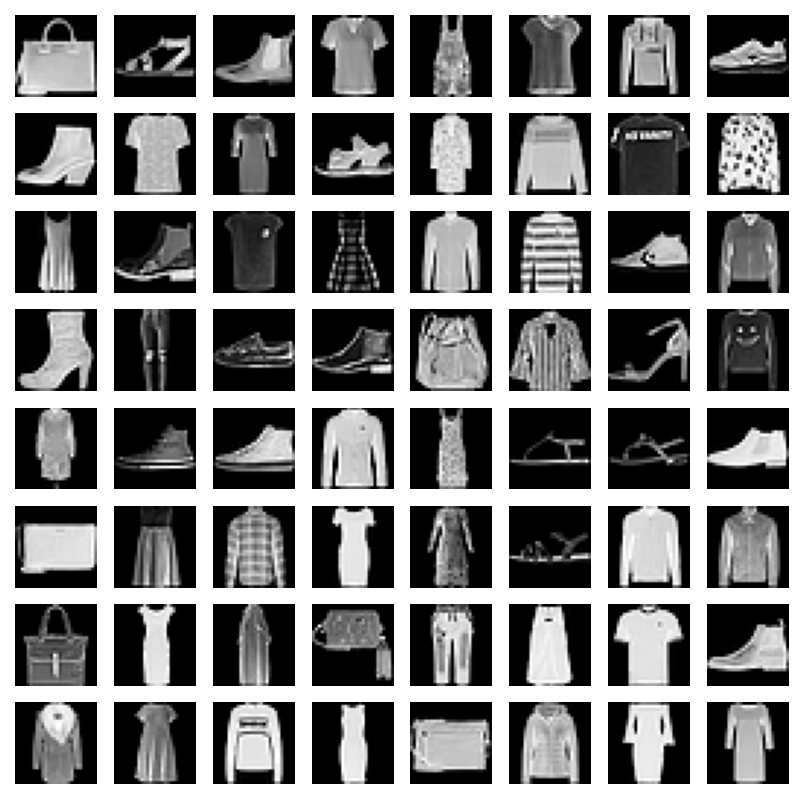

In [3]:
indices = list(np.random.randint(60000, size = 64))
rows = 8
cols = 8
fig = plt.figure(figsize = (rows, cols))
for i in range(1, rows * cols + 1):
    img = train_set[indices[i - 1]][0] # in the tuple, the first element is the image with index 0 and the second element is the label with index 1
    #img, label = train_set[indices[i - 1]]
    fig.add_subplot(rows, cols, i)
    plt.axis('off')
    plt.imshow(img, cmap = 'gray', vmin= 0, vmax = 255) # vmin and vmax are the minimum and maximum values of the pixel intensities or in vietnamese, độ sáng của 1 pixel

#CONVER DATA TO TENSOR

In [4]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms

transforms = transforms.Compose([transforms.ToTensor()])
#ToTensor will convert the PIL image to a tensor with shape c x h x w and normalize the pixel values to the range [0, 1] automatically
train_set = FashionMNIST(root= 'data',
                         train = True,
                         download = True, transform = transforms)

img, label = train_set[0]
print(type(img))
print(img.shape)

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


Shape of the image tensor is c x h x w , it's different from the shape of the PIL image, which is 
c is the number of channels, since the image is grayscale, c = 1, h is the height and w is the width of the image. In PIL image, the shape is h x w x c

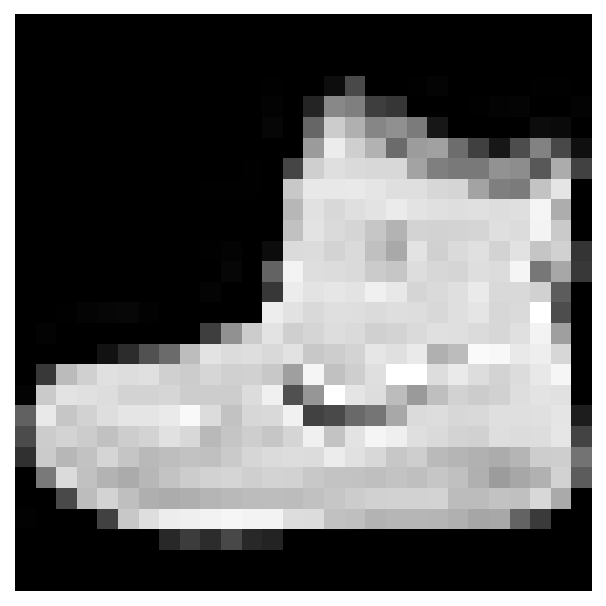

(-0.5, 27.5, 27.5, -0.5)

In [5]:
#In this case, if we want to plot the image, we need to convert the tensor to numpy array and transpose the shape of the tensor
import matplotlib.pyplot as plt

img, _ = train_set[0]
np_img = img.numpy()
np_img = np_img.transpose(1, 2, 0) # convert the shape from c x h x w to h x w x c
plt.imshow(np_img, cmap = 'gray')
plt.axis('off')

# DATALOADERS IN PYTORCH

## MINI-BATCHES

In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision import transforms

transforms = transforms.Compose([transforms.ToTensor()])

train_set = FashionMNIST(root = 'data',
                         train = True,
                         download = True,
                         transform = transforms)
train_loader = DataLoader(train_set,
                         batch_size = 3500,
                         num_workers = 2,
                         shuffle = True)
#batch_size is the number of samples in each mini-batch
#num_workers is the number of processes that generate batches in paralled, or we can say it is thread
#shuffle is a boolean value that indicates whether to shuffle the dataset at every epoch or not

In [6]:
# batch-size = 3500
for i, (imgs, labels) in enumerate(train_loader, 0):
    print(f'Batch index {i + 1} -- Images size {imgs.shape} -- Labels size {labels.shape}')

Batch index 1 -- Images size torch.Size([3500, 1, 28, 28]) -- Labels size torch.Size([3500])
Batch index 2 -- Images size torch.Size([3500, 1, 28, 28]) -- Labels size torch.Size([3500])
Batch index 3 -- Images size torch.Size([3500, 1, 28, 28]) -- Labels size torch.Size([3500])
Batch index 4 -- Images size torch.Size([3500, 1, 28, 28]) -- Labels size torch.Size([3500])
Batch index 5 -- Images size torch.Size([3500, 1, 28, 28]) -- Labels size torch.Size([3500])
Batch index 6 -- Images size torch.Size([3500, 1, 28, 28]) -- Labels size torch.Size([3500])
Batch index 7 -- Images size torch.Size([3500, 1, 28, 28]) -- Labels size torch.Size([3500])
Batch index 8 -- Images size torch.Size([3500, 1, 28, 28]) -- Labels size torch.Size([3500])
Batch index 9 -- Images size torch.Size([3500, 1, 28, 28]) -- Labels size torch.Size([3500])
Batch index 10 -- Images size torch.Size([3500, 1, 28, 28]) -- Labels size torch.Size([3500])
Batch index 11 -- Images size torch.Size([3500, 1, 28, 28]) -- Labels

# We can see in batch size index 18, the number of images is 500, which is the remainder of 60000/3500